In [16]:
client = GraknClient(uri='64.225.121.230:48555', credentials={"username": "root", "password": "Bab235"})
session = client.session(keyspace=KEYSPACE)

#credentials={"username": "<username>", "password": "<password>"}
#graphs = create_concept_graphs(list(range(num_graphs)), session)

In [17]:
client.keyspaces().retrieve()

['diagnosis', 'grakn', 'papertest2', 'papertest1', 'test3']

In [19]:
#
#  Licensed to the Apache Software Foundation (ASF) under one
#  or more contributor license agreements.  See the NOTICE file
#  distributed with this work for additional information
#  regarding copyright ownership.  The ASF licenses this file
#  to you under the Apache License, Version 2.0 (the
#  "License"); you may not use this file except in compliance
#  with the License.  You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing,
#  software distributed under the License is distributed on an
#  "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY
#  KIND, either express or implied.  See the License for the
#  specific language governing permissions and limitations
#  under the License.
#



from kglib.kgcn.pipeline.pipeline import pipeline
from kglib.utils.grakn.synthetic.examples.diagnosis.generate import generate_example_graphs
from kglib.utils.grakn.type.type import get_thing_types, get_role_types
from kglib.utils.graph.iterate import multidigraph_data_iterator
from kglib.utils.graph.query.query_graph import QueryGraph
from kglib.utils.graph.thing.queries_to_graph import build_graph_from_queries

KEYSPACE = "diagnosis"
#"localhost:48555"
URI = '64.225.121.230:48555'
CREDENTIALS={"username": "root", "password": "Bab235"}

# Existing elements in the graph are those that pre-exist in the graph, and should be predicted to continue to exist
PREEXISTS = 0

# Candidates are neither present in the input nor in the solution, they are negative samples
CANDIDATE = 1

# Elements to infer are the graph elements whose existence we want to predict to be true, they are positive samples
TO_INFER = 2

# Categorical Attribute types and the values of their categories
CATEGORICAL_ATTRIBUTES = {'name': ['Diabetes Type II', 'Multiple Sclerosis', 'Blurred vision', 'Fatigue', 'Cigarettes',
                                   'Alcohol']}
# Continuous Attribute types and their min and max values
CONTINUOUS_ATTRIBUTES = {'severity': (0, 1), 'age': (7, 80), 'units-per-week': (3, 29)}

TYPES_TO_IGNORE = ['candidate-diagnosis', 'example-id', 'probability-exists', 'probability-non-exists', 'probability-preexists']
ROLES_TO_IGNORE = ['candidate-patient', 'candidate-diagnosed-disease']

# The learner should see candidate relations the same as the ground truth relations, so adjust these candidates to
# look like their ground truth counterparts
TYPES_AND_ROLES_TO_OBFUSCATE = {'candidate-diagnosis': 'diagnosis',
                                'candidate-patient': 'patient',
                                'candidate-diagnosed-disease': 'diagnosed-disease'}


insert $p isa person, has example-id 0;
insert $doc isa person, has example-id 20000;
match
$p isa person, has example-id 0;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20000;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 67;
match
$p isa person, has example-id 0;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.81;
match
$p isa person, has example-id 0;
$d isa disease, has name "Diabetes Type II";
insert
(parent: $parent, child: $p) isa parentship;
$parent isa person, has example-id 10000;
(patient: $parent, diagnosed-disease: $d) isa diagnosis;
insert $p isa person, has example-id 1;
insert $doc isa person, has example-id 20001;
match
$p isa person, has example-id 1;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20001;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p

insert $p isa person, has example-id 13;
insert $doc isa person, has example-id 20013;
match
$p isa person, has example-id 13;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20013;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 54;
match
$p isa person, has example-id 13;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.41;
insert $p isa person, has example-id 14;
insert $doc isa person, has example-id 20014;
match
$p isa person, has example-id 14;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20014;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 57;
match
$p isa person, has example-id 14;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.17;
match
$p isa person, has example

insert $p isa person, has example-id 24;
insert $doc isa person, has example-id 20024;
match
$p isa person, has example-id 24;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20024;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 58;
match
$p isa person, has example-id 24;
$s isa symptom, has name "Fatigue";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.39;
insert $p isa person, has example-id 25;
insert $doc isa person, has example-id 20025;
match
$p isa person, has example-id 25;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20025;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 54;
match
$p isa person, has example-id 25;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.54;
insert $p isa person, has example-id 26

insert $p isa person, has example-id 38;
insert $doc isa person, has example-id 20038;
match
$p isa person, has example-id 38;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20038;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 64;
match
$p isa person, has example-id 38;
$s isa symptom, has name "Fatigue";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.43;
match
$p isa person, has example-id 38;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.34;
match
$p isa person, has example-id 38;
$s isa substance, has name "Alcohol";
insert
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week 20;
match
$p isa person, has example-id 38;
$d isa disease, has name "Diabetes Type II";
insert
(parent: $parent, child: $p) isa parentship;
$parent isa person, has example-id

insert $p isa person, has example-id 51;
insert $doc isa person, has example-id 20051;
match
$p isa person, has example-id 51;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20051;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 49;
match
$p isa person, has example-id 51;
$s isa symptom, has name "Fatigue";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.37;
match
$p isa person, has example-id 51;
$s isa substance, has name "Alcohol";
insert
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week 17;
insert $p isa person, has example-id 52;
insert $doc isa person, has example-id 20052;
match
$p isa person, has example-id 52;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20052;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 53;
match
$p isa person, has example-id 52;
$s isa symptom, h

insert $p isa person, has example-id 65;
insert $doc isa person, has example-id 20065;
match
$p isa person, has example-id 65;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20065;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 24;
match
$p isa person, has example-id 65;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.31;
match
$p isa person, has example-id 65;
$d isa disease, has name "Diabetes Type II";
insert
(parent: $parent, child: $p) isa parentship;
$parent isa person, has example-id 10065;
(patient: $parent, diagnosed-disease: $d) isa diagnosis;
insert $p isa person, has example-id 66;
insert $doc isa person, has example-id 20066;
match
$p isa person, has example-id 66;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20066;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnos

insert $p isa person, has example-id 79;
insert $doc isa person, has example-id 20079;
match
$d isa disease, has name "Multiple Sclerosis";
$p isa person, has example-id 79;
$doc isa person, has example-id 20079;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 33;
match
$p isa person, has example-id 79;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.58;
insert $p isa person, has example-id 80;
insert $doc isa person, has example-id 20080;
match
$p isa person, has example-id 80;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20080;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 32;
match
$p isa person, has example-id 80;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.27;
insert $p isa person, has exam

insert $p isa person, has example-id 93;
insert $doc isa person, has example-id 20093;
match
$d isa disease, has name "Multiple Sclerosis";
$p isa person, has example-id 93;
$doc isa person, has example-id 20093;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 24;
match
$p isa person, has example-id 93;
$s isa symptom, has name "Fatigue";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.26;
match
$p isa person, has example-id 93;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.52;
match
$p isa person, has example-id 93;
$s isa substance, has name "Cigarettes";
insert
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week 4;
insert $p isa person, has example-id 94;
insert $doc isa person, has example-id 20094;
match
$d isa disease, has name "Multiple Sclerosis";
$p isa person, has example-

insert $p isa person, has example-id 106;
insert $doc isa person, has example-id 20106;
match
$p isa person, has example-id 106;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20106;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 60;
match
$p isa person, has example-id 106;
$s isa symptom, has name "Fatigue";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.14;
match
$p isa person, has example-id 106;
$s isa substance, has name "Alcohol";
insert
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week 20;
insert $p isa person, has example-id 107;
insert $doc isa person, has example-id 20107;
match
$p isa person, has example-id 107;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20107;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 65;
match
$p isa person, has example-id 107;
$s isa sym

insert $p isa person, has example-id 118;
insert $doc isa person, has example-id 20118;
match
$d isa disease, has name "Multiple Sclerosis";
$p isa person, has example-id 118;
$doc isa person, has example-id 20118;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 33;
match
$p isa person, has example-id 118;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.61;
insert $p isa person, has example-id 119;
insert $doc isa person, has example-id 20119;
match
$p isa person, has example-id 119;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20119;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 37;
match
$p isa person, has example-id 119;
$s isa symptom, has name "Fatigue";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.28;
match
$p isa person, has exampl

insert $p isa person, has example-id 129;
insert $doc isa person, has example-id 20129;
match
$d isa disease, has name "Multiple Sclerosis";
$p isa person, has example-id 129;
$doc isa person, has example-id 20129;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 34;
match
$p isa person, has example-id 129;
$s isa symptom, has name "Fatigue";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.33;
match
$p isa person, has example-id 129;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.57;
match
$p isa person, has example-id 129;
$s isa substance, has name "Cigarettes";
insert
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week 7;
insert $p isa person, has example-id 130;
insert $doc isa person, has example-id 20130;
match
$d isa disease, has name "Multiple Sclerosis";
$p isa person, has ex

insert $p isa person, has example-id 142;
insert $doc isa person, has example-id 20142;
match
$p isa person, has example-id 142;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20142;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 59;
match
$p isa person, has example-id 142;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.57;
insert $p isa person, has example-id 143;
insert $doc isa person, has example-id 20143;
match
$p isa person, has example-id 143;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20143;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 56;
match
$p isa person, has example-id 143;
$s isa symptom, has name "Fatigue";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.24;
match
$p isa person, has example-

insert $p isa person, has example-id 155;
insert $doc isa person, has example-id 20155;
match
$p isa person, has example-id 155;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20155;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 57;
match
$p isa person, has example-id 155;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.8;
match
$p isa person, has example-id 155;
$d isa disease, has name "Diabetes Type II";
insert
(parent: $parent, child: $p) isa parentship;
$parent isa person, has example-id 10155;
(patient: $parent, diagnosed-disease: $d) isa diagnosis;
insert $p isa person, has example-id 156;
insert $doc isa person, has example-id 20156;
match
$d isa disease, has name "Multiple Sclerosis";
$p isa person, has example-id 156;
$doc isa person, has example-id 20156;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa 

insert $p isa person, has example-id 169;
insert $doc isa person, has example-id 20169;
match
$d isa disease, has name "Multiple Sclerosis";
$p isa person, has example-id 169;
$doc isa person, has example-id 20169;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 40;
match
$p isa person, has example-id 169;
$s isa symptom, has name "Fatigue";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.24;
match
$p isa person, has example-id 169;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.41;
match
$p isa person, has example-id 169;
$s isa substance, has name "Cigarettes";
insert
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week 4;
insert $p isa person, has example-id 170;
insert $doc isa person, has example-id 20170;
match
$p isa person, has example-id 170;
$d isa disease, has name "Diabete

insert $p isa person, has example-id 181;
insert $doc isa person, has example-id 20181;
match
$d isa disease, has name "Multiple Sclerosis";
$p isa person, has example-id 181;
$doc isa person, has example-id 20181;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 23;
match
$p isa person, has example-id 181;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.48;
insert $p isa person, has example-id 182;
insert $doc isa person, has example-id 20182;
match
$d isa disease, has name "Multiple Sclerosis";
$p isa person, has example-id 182;
$doc isa person, has example-id 20182;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 33;
match
$p isa person, has example-id 182;
$s isa symptom, has name "Fatigue";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.34;
match
$p isa person, has exam

insert $p isa person, has example-id 195;
insert $doc isa person, has example-id 20195;
match
$p isa person, has example-id 195;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20195;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 50;
match
$p isa person, has example-id 195;
$s isa symptom, has name "Fatigue";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.4;
insert $p isa person, has example-id 196;
insert $doc isa person, has example-id 20196;
match
$p isa person, has example-id 196;
$d isa disease, has name "Diabetes Type II";
$doc isa person, has example-id 20196;
insert
(patient: $p, diagnosed-disease: $d, doctor: $doc) isa diagnosis;
$p has age 66;
match
$p isa person, has example-id 196;
$s isa symptom, has name "Blurred vision";
insert
(presented-symptom: $s, symptomatic-patient: $p) isa 
symptom-presentation, has severity 0.62;
match
$p isa person, has example-i

/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 0;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 1


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 1;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 2


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 2;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 2;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to th

Creating graph for example 3


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 3;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 3;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to th

Creating graph for example 4


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 4; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 4;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kgl

Creating graph for example 5


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 5;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 5;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to th

Creating graph for example 6


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 6; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 6;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kgl

Creating graph for example 7


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 7;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 7;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to th

Creating graph for example 8


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 8;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 8;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to th

Creating graph for example 9


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 9;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 10
Creating graph for example 11


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 11;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 11;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 12


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 12; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 12;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 13


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 13;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 13;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 14


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 14;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 15


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 15; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 15;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 16


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 16;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 17


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 17; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 17;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 18


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 18;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 19


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 19;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 19;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 20


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 20;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 20;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 21
Creating graph for example 22


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 22;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 23
Creating graph for example 24


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 24;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 24;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 25


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 25;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 25;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 26


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 26;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 26;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 27


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 27;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 27;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 28


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 28;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 28;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 29


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 29;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 30


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 30; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 30;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 31


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 31;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 32


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 32;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 33


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 33;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 33;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 34


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 34;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 35


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 35;
$d isa disease, has name $dn;
$diag(candidate-patient: $p, candidate-diagnosed-disease: $d) isa candidate-diagnosis; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 35;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_C

Creating graph for example 36


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 36;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 36;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 37


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 37;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 37;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 38
Creating graph for example 39


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 39; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 39;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 40


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 40;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 41


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 41; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 41;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 42


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 42;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 42;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 43


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 43; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 43;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 44


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 44; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 44;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 45


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 45;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 45;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 46


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 46; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 46;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 47


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 47;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 47;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 48


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 48;
$d isa disease, has name $dn;
$diag(candidate-patient: $p, candidate-diagnosed-disease: $d) isa candidate-diagnosis; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 48;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_C

Creating graph for example 49


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 49;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 49;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 50


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 50;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 51


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 51;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 52


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 52;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 52;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 53


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 53;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 53;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 54


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 54;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 54;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 55


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 55; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 55;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 56


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 56;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 57


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 57;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 57;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 58


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 58;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 59


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 59;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 60


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 60; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 60;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 61


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 61;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 62


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 62; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 62;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 63


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 63;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 63;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 64


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 64;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 65


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 65;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 66


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 66;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 67


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 67; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 67;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 68


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 68;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 68;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 69


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 69; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 69;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 70


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 70; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 70;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 71


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 71;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 72


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 72;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 73


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 73;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 73;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 74


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 74;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 74;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 75


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 75;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 75;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 76


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 76;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 76;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 77


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 77; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 77;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 78


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 78;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 79


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 79; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 79;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 80


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 80; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 80;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 81


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 81; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 81;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 82


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 82; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 82;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 83


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 83;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 83;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 84


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 84;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 84;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 85


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 85;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 85;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 86


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 86;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 87
Creating graph for example 88
Creating graph for example 89


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 89;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 89;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 90


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 90; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 90;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 91


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 91;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 91;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 92


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 92; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 92;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 93


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 93; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 93;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 94


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 94; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 94;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 95


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 95;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 96


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 96;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 97


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 97; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 97;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/k

Creating graph for example 98


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 98; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 98;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 99


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 99;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 99;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to 

Creating graph for example 100


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 100;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 100;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 101


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 101;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 102


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 102;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 103


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 103; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 103;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 104


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 104;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 105


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 105; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 105;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 106


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 106;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 107


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 107;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 107;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 108


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 108; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 108;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 109


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 109;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 109;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 110


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 110;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 110;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 111


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 111;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 112


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 112;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 113


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 113;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 113;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 114


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 114;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 115
Creating graph for example 116


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 116;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 117


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 117;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 118


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 118; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 118;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 119
Creating graph for example 120


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 120; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 120;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 121
Creating graph for example 122


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 122;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 123


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 123;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 123;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 124


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 124;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 125


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 125; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 125;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 126


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 126;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 127


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 127;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 128


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 128;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 128;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 129


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 129; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 129;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 130


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 130;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 131


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 131; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 131;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 132


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 132;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 133


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 133;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 134


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 134;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 134;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 135


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 135;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 136


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 136; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 136;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 137


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 137;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 137;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 138


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 138;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 138;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 139


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 139;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 139;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 140


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 140;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 140;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 141


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 141; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 141;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 142


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 142;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 142;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 143


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 143;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 143;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 144


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 144;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 145


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 145;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 146


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 146;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 147


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 147;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 147;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 148


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 148;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 148;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 149


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 149;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 150
Creating graph for example 151


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 151;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 151;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 152


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 152;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 152;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 153


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 153; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 153;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 154


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 154; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 154;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 155


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 155;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 156


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 156; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 156;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 157


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 157;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 158


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 158; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 158;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 159


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 159;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 159;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 160


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 160;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 160;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 161


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 161;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 162


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 162; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 162;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 163


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 163; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 163;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 164
Creating graph for example 165


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 165;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 165;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 166


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 166;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 166;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 167


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 167;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 167;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 168


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 168;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 168;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 169


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 169;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 170


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 170;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 170;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 171


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 171;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 171;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 172


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 172;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 172;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 173


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 173; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 173;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 174


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 174;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 175


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 175; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 175;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 176


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 176;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 176;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 177


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 177;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 177;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 178
Creating graph for example 179


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 179;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 179;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 180


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 180;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 181


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 181; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 181;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 182


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 182; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 182;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 183


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 183; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 183;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 184


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 184;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 185


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 185;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 185;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 186


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 186; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 186;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 187


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 187;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 187;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 188


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 188;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 188;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 189


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 189;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 189;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 190


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 190; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 190;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 191
Creating graph for example 192


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 192; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 192;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 193


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 193; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 193;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects

Creating graph for example 194


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 194;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 195


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 195;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 195;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 196


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 196;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 197


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match 
$d isa disease; 
$p isa person, has example-id 197; 
$r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 197;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '


Creating graph for example 198


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 198;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 198;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Creating graph for example 199


/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 199;
$s isa substance, has name $n;
$c(consumer: $p, consumed-substance: $s) isa consumption, 
has units-per-week $u; get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added to the '
/Users/user/Dropbox/JOB_Current/Austin_Capital_data_/Projects/kglib/kglib/utils/graph/thing/queries_to_graph.py:128: UserWarning: There were no results for query: 
"match
$p isa person, has example-id 199;
$par isa person;
$ps(child: $p, parent: $par) isa parentship;
$diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
$d isa disease, has name $n;
get;"
and so nothing will be added to the graph for this query
  warnings.warn(f'There were no results for query: \n\"{query}\"\nand so nothing will be added t

Found node types: ['diagnosis', 'risk-factor', 'symptom-presentation', 'causality', 'consumption', 'parentship', 'units-per-week', 'severity', 'age', 'name', 'person', 'symptom', 'disease', 'substance', 'kgcn', 'smoking-risk-factor', 'alcohol-risk-factor', 'age-risk-factor', 'hereditary-risk-factor']
Found edge types: ['has', 'doctor', 'symptomatic-patient', 'consumer', 'risked-disease', 'patient', 'presented-symptom', 'cause', 'diagnosed-disease', 'diagnoser', 'effect', 'parent', 'person-at-risk', 'child', 'consumed-substance']




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.





/Users/user/anaconda3/envs/graknml/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/user/anaconda3/envs/graknml/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/user/anaconda3/envs/graknml/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/user/anaconda3/envs/graknml/lib/python3.6/site-packages/tensorflow/python/ops/gra

RoleEmbedder/embed/embeddings:0
INFO:tensorflow:Summary name gradients/RoleEmbedder/embed/embeddings:0 is illegal; using gradients/RoleEmbedder/embed/embeddings_0 instead.
RoleEmbedder/layer_norm/gamma:0
INFO:tensorflow:Summary name gradients/RoleEmbedder/layer_norm/gamma:0 is illegal; using gradients/RoleEmbedder/layer_norm/gamma_0 instead.
RoleEmbedder/layer_norm/beta:0
INFO:tensorflow:Summary name gradients/RoleEmbedder/layer_norm/beta:0 is illegal; using gradients/RoleEmbedder/layer_norm/beta_0 instead.
KGCN/kg_encoder/edge_model/mlp/linear_0/w:0
INFO:tensorflow:Summary name gradients/KGCN/kg_encoder/edge_model/mlp/linear_0/w:0 is illegal; using gradients/KGCN/kg_encoder/edge_model/mlp/linear_0/w_0 instead.
KGCN/kg_encoder/edge_model/mlp/linear_0/b:0
INFO:tensorflow:Summary name gradients/KGCN/kg_encoder/edge_model/mlp/linear_0/b:0 is illegal; using gradients/KGCN/kg_encoder/edge_model/mlp/linear_0/b_0 instead.
KGCN/kg_encoder/edge_model/mlp/linear_1/w:0
INFO:tensorflow:Summary nam

ThingEmbedder/typewise_encoder/units-per-week_cat_embedder_2/mlp/linear_1/b:0
INFO:tensorflow:Summary name gradients/ThingEmbedder/typewise_encoder/units-per-week_cat_embedder_2/mlp/linear_1/b:0 is illegal; using gradients/ThingEmbedder/typewise_encoder/units-per-week_cat_embedder_2/mlp/linear_1/b_0 instead.
ThingEmbedder/typewise_encoder/units-per-week_cat_embedder_2/mlp/linear_2/w:0
INFO:tensorflow:Summary name gradients/ThingEmbedder/typewise_encoder/units-per-week_cat_embedder_2/mlp/linear_2/w:0 is illegal; using gradients/ThingEmbedder/typewise_encoder/units-per-week_cat_embedder_2/mlp/linear_2/w_0 instead.
ThingEmbedder/typewise_encoder/units-per-week_cat_embedder_2/mlp/linear_2/b:0
INFO:tensorflow:Summary name gradients/ThingEmbedder/typewise_encoder/units-per-week_cat_embedder_2/mlp/linear_2/b:0 is illegal; using gradients/ThingEmbedder/typewise_encoder/units-per-week_cat_embedder_2/mlp/linear_2/b_0 instead.
ThingEmbedder/typewise_encoder/units-per-week_cat_embedder_2/layer_nor

KGCN/MLPGraphIndependent/graph_independent/node_model/mlp/linear_0/b:0
INFO:tensorflow:Summary name gradients/KGCN/MLPGraphIndependent/graph_independent/node_model/mlp/linear_0/b:0 is illegal; using gradients/KGCN/MLPGraphIndependent/graph_independent/node_model/mlp/linear_0/b_0 instead.
KGCN/MLPGraphIndependent/graph_independent/node_model/mlp/linear_1/w:0
INFO:tensorflow:Summary name gradients/KGCN/MLPGraphIndependent/graph_independent/node_model/mlp/linear_1/w:0 is illegal; using gradients/KGCN/MLPGraphIndependent/graph_independent/node_model/mlp/linear_1/w_0 instead.
KGCN/MLPGraphIndependent/graph_independent/node_model/mlp/linear_1/b:0
INFO:tensorflow:Summary name gradients/KGCN/MLPGraphIndependent/graph_independent/node_model/mlp/linear_1/b:0 is illegal; using gradients/KGCN/MLPGraphIndependent/graph_independent/node_model/mlp/linear_1/b_0 instead.
KGCN/MLPGraphIndependent/graph_independent/node_model/layer_norm/gamma:0
INFO:tensorflow:Summary name gradients/KGCN/MLPGraphIndepend

/Users/user/anaconda3/envs/graknml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/user/anaconda3/envs/graknml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/Users/user/anaconda3/envs/graknml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
/Users/user/anaconda3/envs/graknml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 

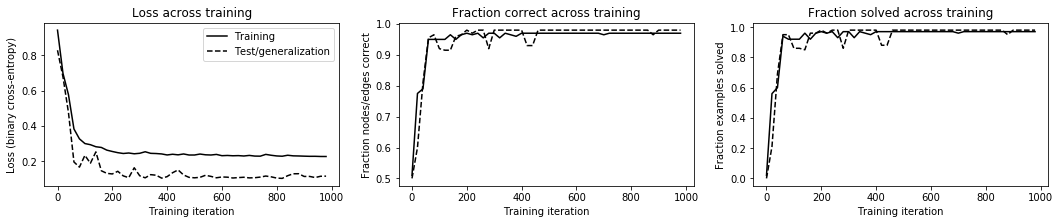

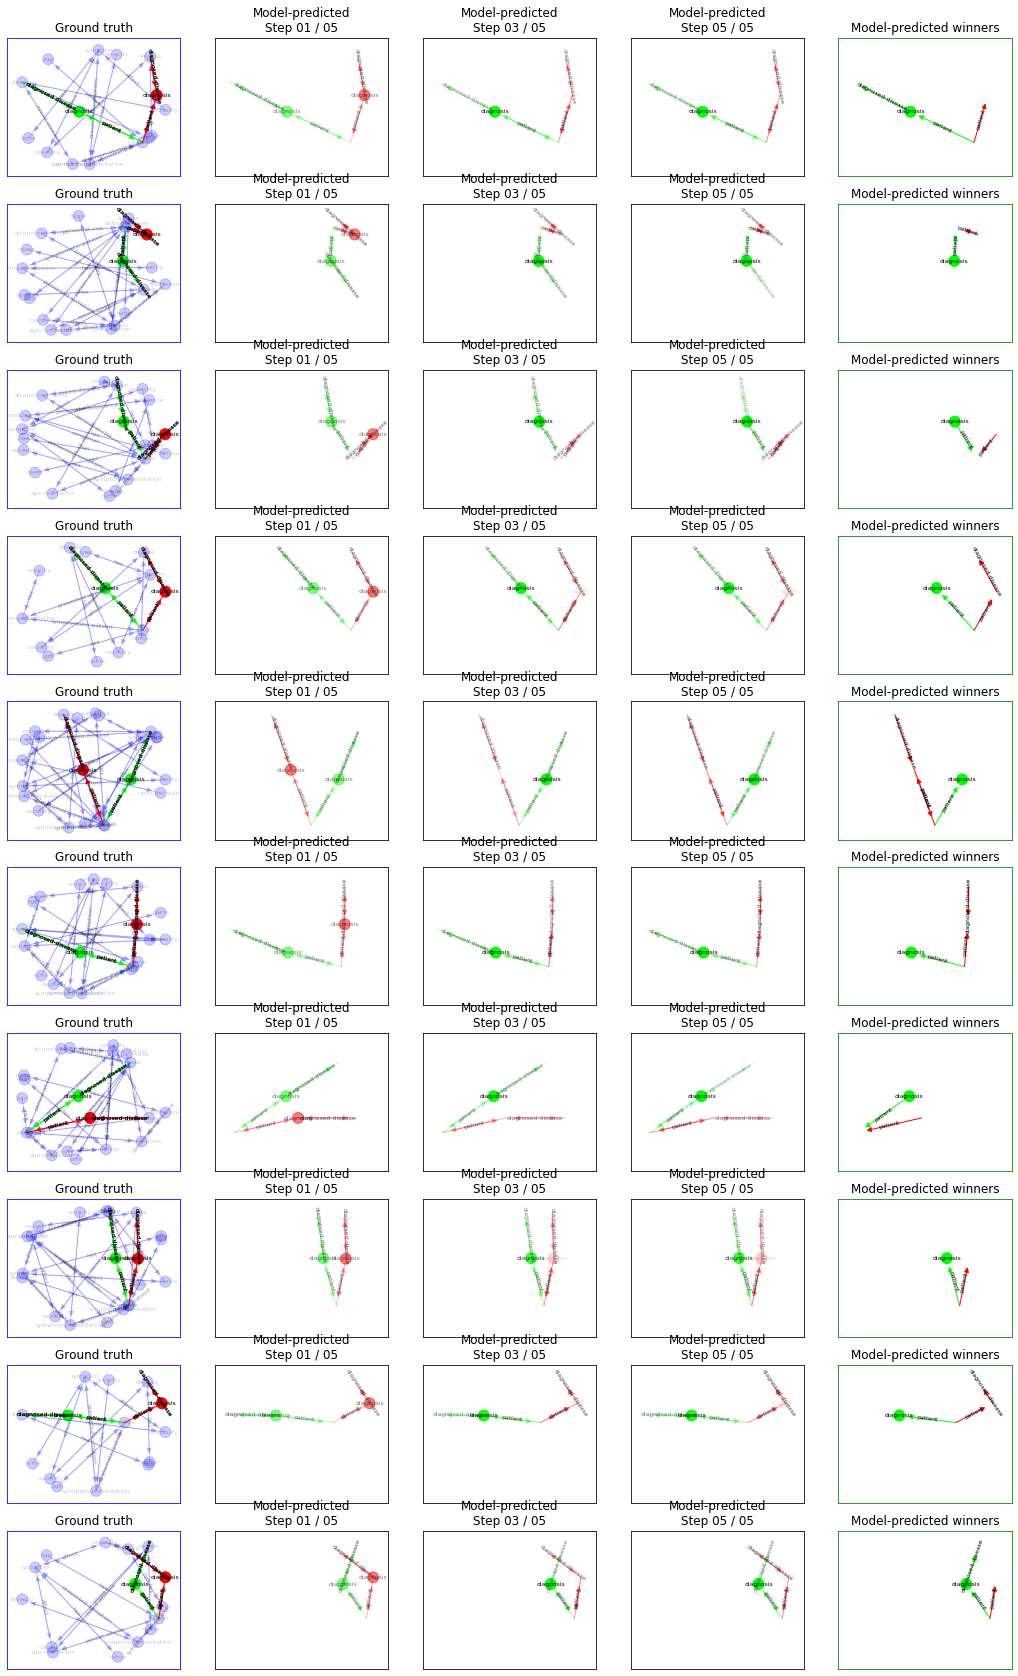

In [20]:
def diagnosis_example(num_graphs=200,
                      num_processing_steps_tr=5,
                      num_processing_steps_ge=5,
                      num_training_iterations=1000,
                      keyspace=KEYSPACE, uri=URI,
                      credentials=CREDENTIALS
                      ):
    """
    Run the diagnosis example from start to finish, including traceably ingesting predictions back into Grakn
    Args:
        num_graphs: Number of graphs to use for training and testing combined
        num_processing_steps_tr: The number of message-passing steps for training
        num_processing_steps_ge: The number of message-passing steps for testing
        num_training_iterations: The number of training epochs
        keyspace: The name of the keyspace to retrieve example subgraphs from
        uri: The uri of the running Grakn instance
    Returns:
        Final accuracies for training and for testing
    """

    tr_ge_split = int(num_graphs*0.5)

    generate_example_graphs(num_graphs, keyspace=keyspace, uri=uri)

    client = GraknClient(uri=uri, credentials=credentials)
    session = client.session(keyspace=keyspace)

    graphs = create_concept_graphs(list(range(num_graphs)), session)

    with session.transaction().read() as tx:
        # Change the terminology here onwards from thing -> node and role -> edge
        node_types = get_thing_types(tx)
        [node_types.remove(el) for el in TYPES_TO_IGNORE]

        edge_types = get_role_types(tx)
        [edge_types.remove(el) for el in ROLES_TO_IGNORE]
        print(f'Found node types: {node_types}')
        print(f'Found edge types: {edge_types}')

    ge_graphs, solveds_tr, solveds_ge = pipeline(graphs,
                                                 tr_ge_split,
                                                 node_types,
                                                 edge_types,
                                                 num_processing_steps_tr=num_processing_steps_tr,
                                                 num_processing_steps_ge=num_processing_steps_ge,
                                                 num_training_iterations=num_training_iterations,
                                                 continuous_attributes=CONTINUOUS_ATTRIBUTES,
                                                 categorical_attributes=CATEGORICAL_ATTRIBUTES,
                                                 output_dir=f"./events/{time.time()}/")

    with session.transaction().write() as tx:
        write_predictions_to_grakn(ge_graphs, tx)

    session.close()
    client.close()

    return solveds_tr, solveds_ge


def create_concept_graphs(example_indices, grakn_session):
    """
    Builds an in-memory graph for each example, with an example_id as an anchor for each example subgraph.
    Args:
        example_indices: The values used to anchor the subgraph queries within the entire knowledge graph
        grakn_session: Grakn Session
    Returns:
        In-memory graphs of Grakn subgraphs
    """

    graphs = []
    infer = True

    for example_id in example_indices:
        print(f'Creating graph for example {example_id}')
        graph_query_handles = get_query_handles(example_id)
        with grakn_session.transaction().read() as tx:
            # Build a graph from the queries, samplers, and query graphs
            graph = build_graph_from_queries(graph_query_handles, tx, infer=infer)

        obfuscate_labels(graph, TYPES_AND_ROLES_TO_OBFUSCATE)

        graph.name = example_id
        graphs.append(graph)

    return graphs


def obfuscate_labels(graph, types_and_roles_to_obfuscate):
    # Remove label leakage - change type labels that indicate candidates into non-candidates
    for data in multidigraph_data_iterator(graph):
        for label_to_obfuscate, with_label in types_and_roles_to_obfuscate.items():
            if data['type'] == label_to_obfuscate:
                data.update(type=with_label)
                break


def get_query_handles(example_id):
    """
    Creates an iterable, each element containing a Graql query, a function to sample the answers, and a QueryGraph
    object which must be the Grakn graph representation of the query. This tuple is termed a "query_handle"
    Args:
        example_id: A uniquely identifiable attribute value used to anchor the results of the queries to a specific
                    subgraph
    Returns:
        query handles
    """

    # === Hereditary Feature ===
    hereditary_query = inspect.cleandoc(f'''match
           $p isa person, has example-id {example_id};
           $par isa person;
           $ps(child: $p, parent: $par) isa parentship;
           $diag(patient:$par, diagnosed-disease: $d) isa diagnosis;
           $d isa disease, has name $n;
           get;''')

    vars = p, par, ps, d, diag, n = 'p', 'par', 'ps', 'd', 'diag', 'n'
    hereditary_query_graph = (QueryGraph()
                              .add_vars(vars, PREEXISTS)
                              .add_role_edge(ps, p, 'child', PREEXISTS)
                              .add_role_edge(ps, par, 'parent', PREEXISTS)
                              .add_role_edge(diag, par, 'patient', PREEXISTS)
                              .add_role_edge(diag, d, 'diagnosed-disease', PREEXISTS)
                              .add_has_edge(d, n, PREEXISTS))

    # === Consumption Feature ===
    consumption_query = inspect.cleandoc(f'''match
           $p isa person, has example-id {example_id};
           $s isa substance, has name $n;
           $c(consumer: $p, consumed-substance: $s) isa consumption, 
           has units-per-week $u; get;''')

    vars = p, s, n, c, u = 'p', 's', 'n', 'c', 'u'
    consumption_query_graph = (QueryGraph()
                               .add_vars(vars, PREEXISTS)
                               .add_has_edge(s, n, PREEXISTS)
                               .add_role_edge(c, p, 'consumer', PREEXISTS)
                               .add_role_edge(c, s, 'consumed-substance', PREEXISTS)
                               .add_has_edge(c, u, PREEXISTS))

    # === Age Feature ===
    person_age_query = inspect.cleandoc(f'''match 
            $p isa person, has example-id {example_id}, has age $a; 
            get;''')

    vars = p, a = 'p', 'a'
    person_age_query_graph = (QueryGraph()
                              .add_vars(vars, PREEXISTS)
                              .add_has_edge(p, a, PREEXISTS))

    # === Risk Factors Feature ===
    risk_factor_query = inspect.cleandoc(f'''match 
            $d isa disease; 
            $p isa person, has example-id {example_id}; 
            $r(person-at-risk: $p, risked-disease: $d) isa risk-factor; 
            get;''')

    vars = p, d, r = 'p', 'd', 'r'
    risk_factor_query_graph = (QueryGraph()
                               .add_vars(vars, PREEXISTS)
                               .add_role_edge(r, p, 'person-at-risk', PREEXISTS)
                               .add_role_edge(r, d, 'risked-disease', PREEXISTS))

    # === Symptom ===
    vars = p, s, sn, d, dn, sp, sev, c = 'p', 's', 'sn', 'd', 'dn', 'sp', 'sev', 'c'

    symptom_query = inspect.cleandoc(f'''match
           $p isa person, has example-id {example_id};
           $s isa symptom, has name $sn;
           $d isa disease, has name $dn;
           $sp(presented-symptom: $s, symptomatic-patient: $p) isa symptom-presentation, has severity $sev;
           $c(cause: $d, effect: $s) isa causality;
           get;''')

    symptom_query_graph = (QueryGraph()
                           .add_vars(vars, PREEXISTS)
                           .add_has_edge(s, sn, PREEXISTS)
                           .add_has_edge(d, dn, PREEXISTS)
                           .add_role_edge(sp, s, 'presented-symptom', PREEXISTS)
                           .add_has_edge(sp, sev, PREEXISTS)
                           .add_role_edge(sp, p, 'symptomatic-patient', PREEXISTS)
                           .add_role_edge(c, s, 'effect', PREEXISTS)
                           .add_role_edge(c, d, 'cause', PREEXISTS))

    # === Diagnosis ===

    diag, d, p, dn = 'diag', 'd', 'p', 'dn'

    diagnosis_query = inspect.cleandoc(f'''match
           $p isa person, has example-id {example_id};
           $d isa disease, has name $dn;
           $diag(patient: $p, diagnosed-disease: $d) isa diagnosis;
           get;''')

    diagnosis_query_graph = (QueryGraph()
                             .add_vars([diag], TO_INFER)
                             .add_vars([d, p, dn], PREEXISTS)
                             .add_role_edge(diag, d, 'diagnosed-disease', TO_INFER)
                             .add_role_edge(diag, p, 'patient', TO_INFER))

    # === Candidate Diagnosis ===
    candidate_diagnosis_query = inspect.cleandoc(f'''match
           $p isa person, has example-id {example_id};
           $d isa disease, has name $dn;
           $diag(candidate-patient: $p, candidate-diagnosed-disease: $d) isa candidate-diagnosis; 
           get;''')

    candidate_diagnosis_query_graph = (QueryGraph()
                                       .add_vars([diag], CANDIDATE)
                                       .add_vars([d, p, dn], PREEXISTS)
                                       .add_role_edge(diag, d, 'candidate-diagnosed-disease', CANDIDATE)
                                       .add_role_edge(diag, p, 'candidate-patient', CANDIDATE))

    return [
        (symptom_query, lambda x: x, symptom_query_graph),
        (diagnosis_query, lambda x: x, diagnosis_query_graph),
        (candidate_diagnosis_query, lambda x: x, candidate_diagnosis_query_graph),
        (risk_factor_query, lambda x: x, risk_factor_query_graph),
        (person_age_query, lambda x: x, person_age_query_graph),
        (consumption_query, lambda x: x, consumption_query_graph),
        (hereditary_query, lambda x: x, hereditary_query_graph)
    ]


def write_predictions_to_grakn(graphs, tx):
    """
    Take predictions from the ML model, and insert representations of those predictions back into the graph.
    Args:
        graphs: graphs containing the concepts, with their class predictions and class probabilities
        tx: Grakn write transaction to use
    Returns: None
    """
    for graph in graphs:
        for node, data in graph.nodes(data=True):
            if data['prediction'] == 2:
                concept = data['concept']
                concept_type = concept.type_label
                if concept_type == 'diagnosis' or concept_type == 'candidate-diagnosis':
                    neighbours = graph.neighbors(node)

                    for neighbour in neighbours:
                        concept = graph.nodes[neighbour]['concept']
                        if concept.type_label == 'person':
                            person = concept
                        else:
                            disease = concept

                    p = data['probabilities']
                    query = (f'match'
                             f'$p id {person.id};'
                             f'$d id {disease.id};'
                             f'$kgcn isa kgcn;'
                             f'insert'
                             f'$pd(patient: $p, diagnosed-disease: $d, diagnoser: $kgcn) isa diagnosis,'
                             f'has probability-exists {p[2]:.3f},'
                             f'has probability-non-exists {p[1]:.3f},'  
                             f'has probability-preexists {p[0]:.3f};')
                    tx.query(query)
    tx.commit()


if __name__ == "__main__":
    diagnosis_example()